In [1]:
import os
import pandas as pd
import sklearn
import csv
import datetime
import numpy as np
# 可視化用
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## データの読み込み

UCI machine learning repository

https://archive.ics.uci.edu/ml/datasets/online+news+popularity

In [2]:
df = pd.read_csv("../data/OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# 空白が大量に含まれているため、カラム名を変更
col_names = dict()
for col in df.columns:
    col_remove_space = col.replace(" ", "")
    col_names[col] = col_remove_space
df.rename(columns=col_names, inplace=True)

In [6]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
len(df.columns)

61

In [8]:
[e for e in df.columns if ("polarity" in e) | ("subjectivity" in e) | ("positi" in e) | ("negative" in e)]

['global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

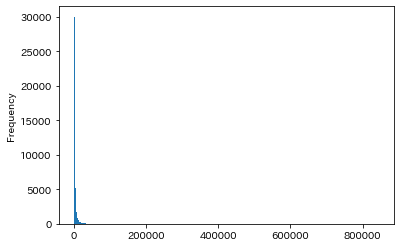

In [9]:
df["shares"].plot.hist(bins=300)

In [10]:
df.shares.max()

843300

In [11]:
df.shares.min()

1

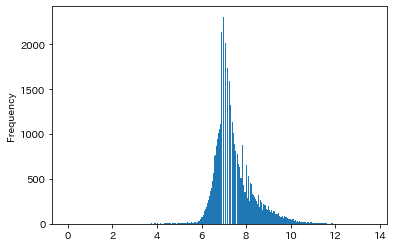

In [12]:
# 回帰問題では、外れ値の影響を抑えるために目的変数を対数変換した方が良い場合がある
df["shares"] = np.log(df["shares"])
df["shares"].plot.hist(bins=300)

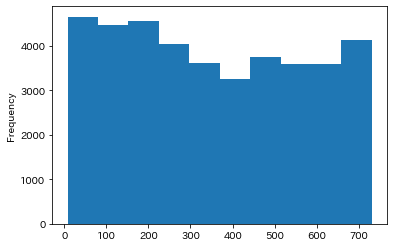

In [13]:
df["timedelta"].plot.hist()

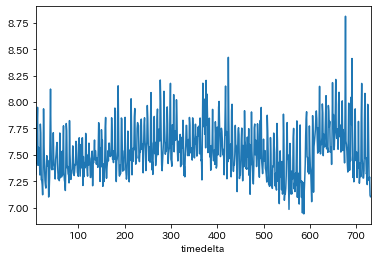

In [14]:
df.groupby("timedelta").mean()["shares"].plot()

# 分析設計
## モデルの概要
ニュースの情報から、shareを予測する

## 説明変数
* 時系列変数
    ['timedelta'
     ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend']
* 記事の基本情報
[     'url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess'
]
* 自然言語情報
    * 極性(polarity)
    * 客観性(subjectivity)
[' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' avg_positive_polarity',
 ' min_positive_polarity',
 ' max_positive_polarity',
 ' avg_negative_polarity',
 ' min_negative_polarity',
 ' max_negative_polarity',
 ' title_subjectivity',
 ' title_sentiment_polarity',
 ' abs_title_subjectivity',
 ' abs_title_sentiment_polarity']

* その他
    * LDA（LinearDiscriminantAnalysis）, 次元削減の手法

## 目的変数
* shares

## 母集団
* train: 300 <= timedelta
* validation: 150 <= timedelta < 300
* test : timedelta < 150

In [15]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,6.385194
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.566672
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,7.313220
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090077
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,6.224558


In [16]:
df_X = df.drop(columns = [
    "url",
    "shares",
    "timedelta"
])
df_y = df["shares"]

In [17]:
train_index = df["timedelta"] >= 300
val_index    = (150 <= df["timedelta"]) & (df["timedelta"] < 300)
test_index  = df["timedelta"] < 150

In [18]:
X_train, y_train = df_X[train_index], df_y[train_index]
X_val, y_val       = df_X[val_index], df_y[val_index]
X_test, y_test   = df_X[test_index], df_y[test_index]

## EDA

In [19]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,7.474855
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,0.930486
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,6.852243
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,7.244228
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,7.937375
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,13.645078


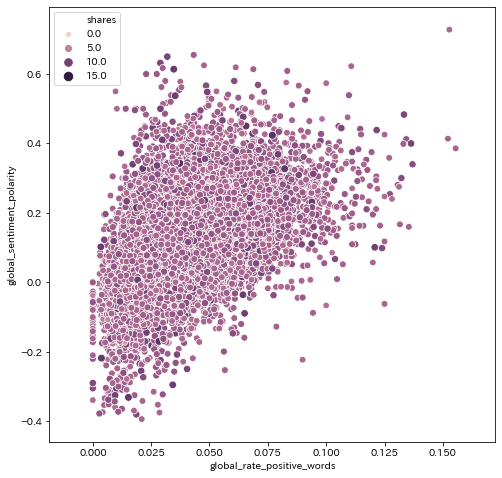

In [20]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(
    x="global_rate_positive_words",
    y="global_sentiment_polarity",
    size="shares",
    hue="shares",
    data=df
)

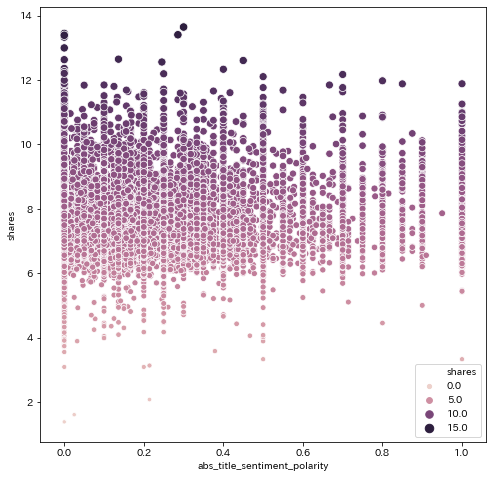

In [21]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(
    x="abs_title_sentiment_polarity",
    y="shares",
    size="shares",
    hue="shares",
    data=df[df["shares"] > 0]
)

In [22]:
[e for e in df.dtypes.items() if e[1] == "object"]

[('url', dtype('O'))]

## 相関の可視化

In [23]:
df.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.019383
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,-0.019030
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.024842
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.004971
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.005406
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.003709
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.105105
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,0.029148
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.091518
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.032049


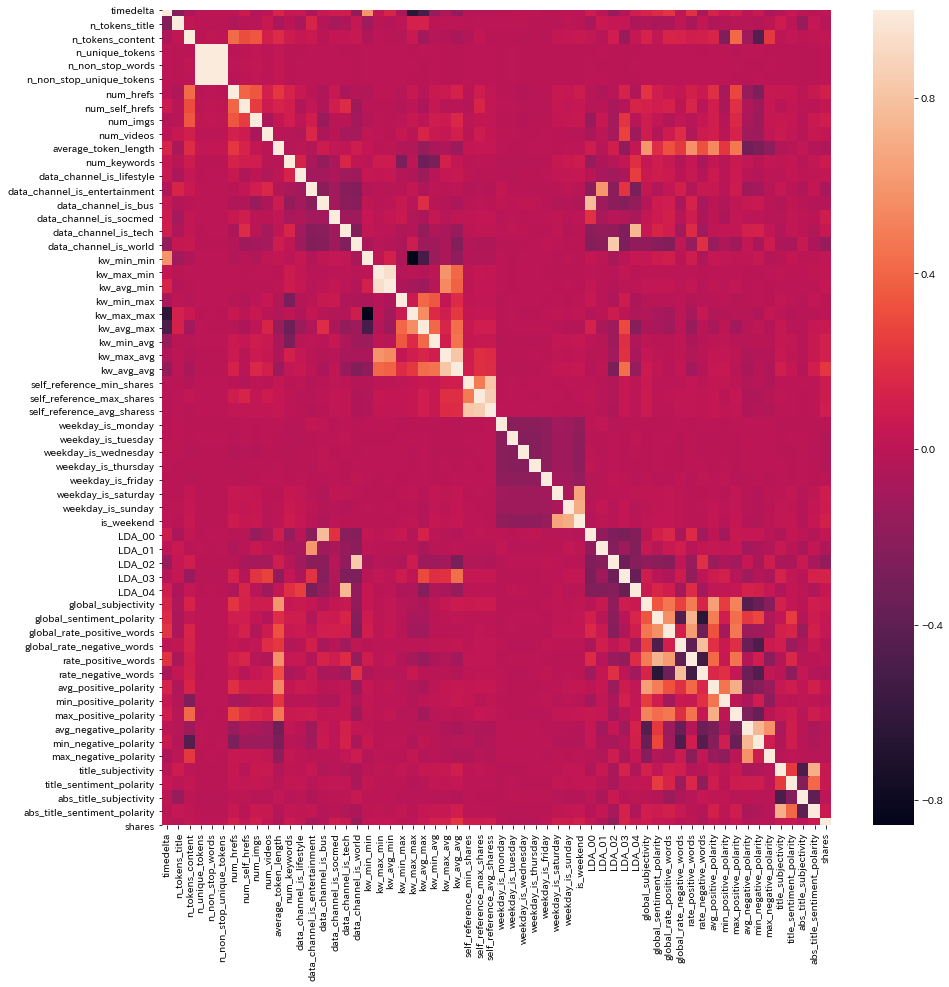

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr())

In [25]:
#top5
top10 = df.corr()["shares"].sort_values(ascending=False)[1:11]
top10

kw_avg_avg                    0.221720
LDA_03                        0.125962
is_weekend                    0.114387
kw_max_avg                    0.109292
kw_min_avg                    0.108823
num_hrefs                     0.105105
num_imgs                      0.091518
self_reference_avg_sharess    0.087217
data_channel_is_socmed        0.081106
weekday_is_saturday           0.079147
Name: shares, dtype: float64

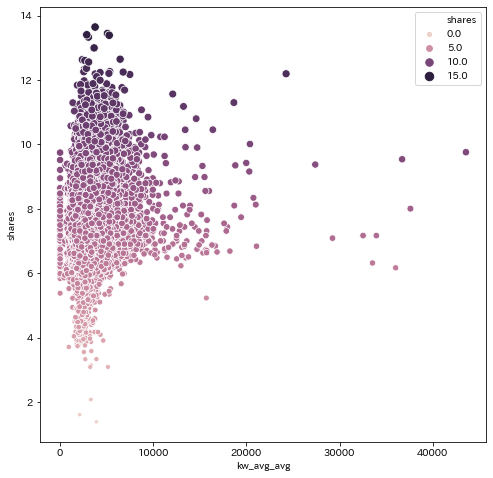

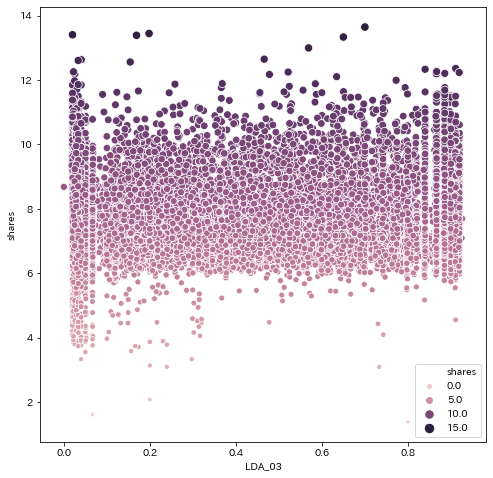

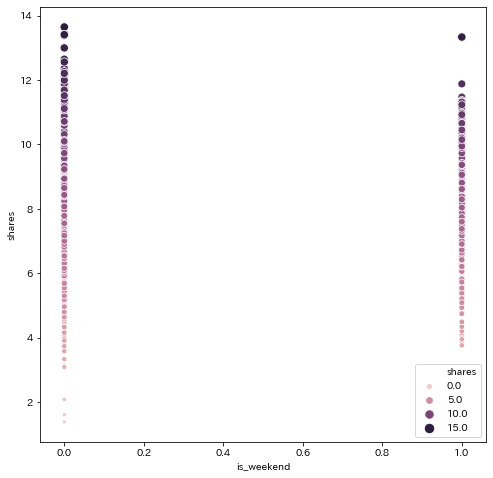

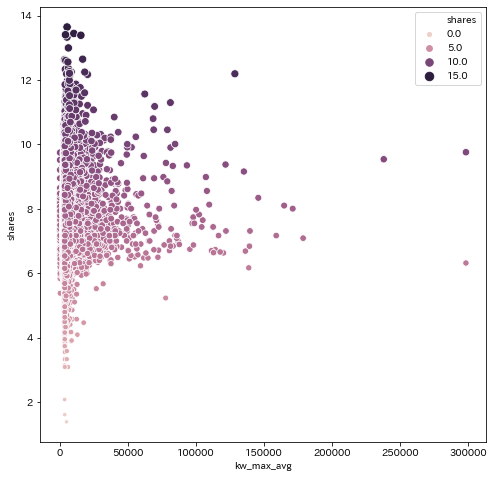

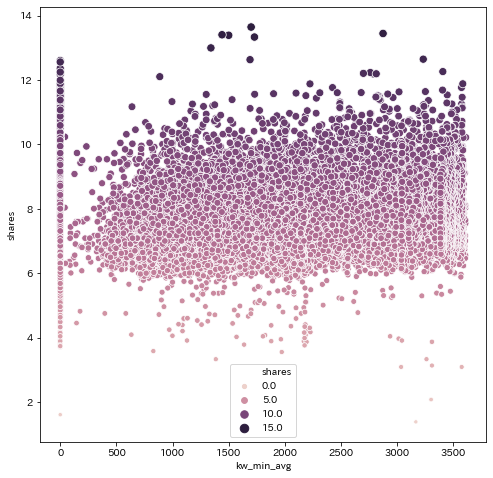

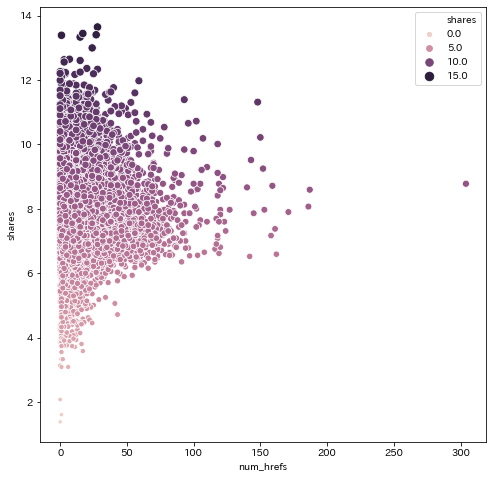

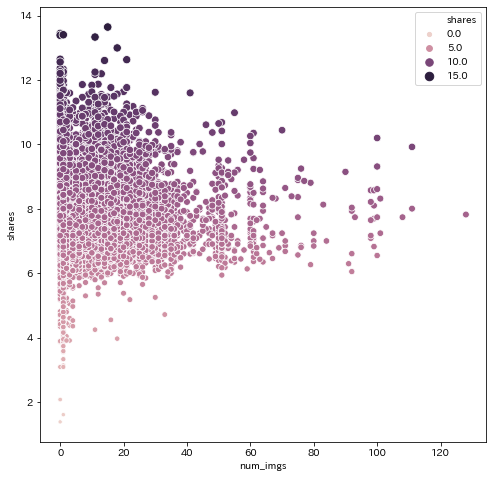

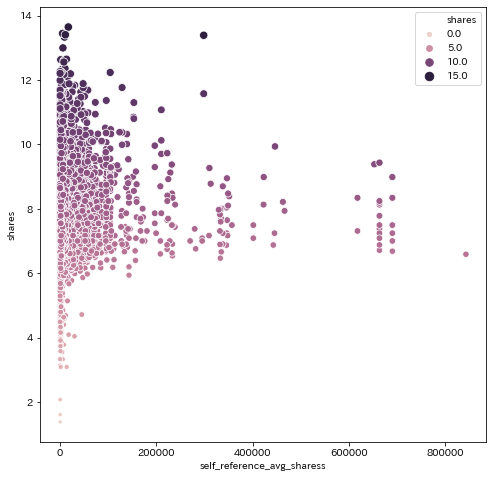

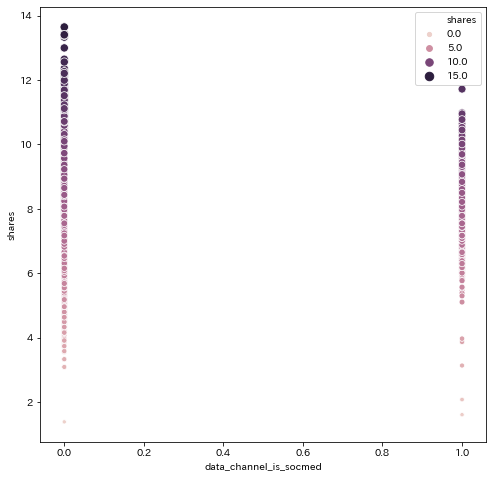

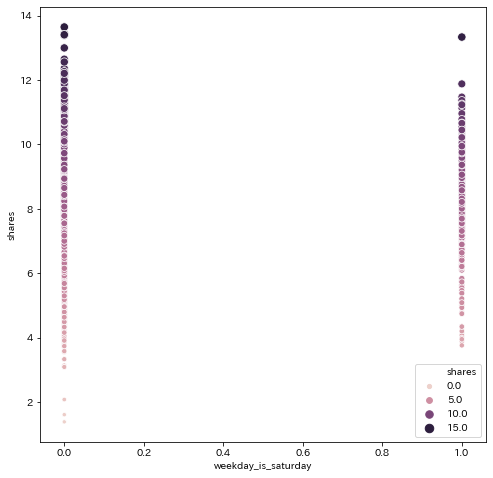

In [26]:
for feat in top10.index:
    plt.figure(figsize=(8, 8))
    ax = sns.scatterplot(
        x=feat,
        y="shares",
        size="shares",
        hue="shares",
        data=df[df["shares"] > 0]
    )
    plt.show()

## Decision tree regression

In [27]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
# Fit regression model
## find good max_depth of decision tree regression
feature_names = top10.index
feature_names

Index(['kw_avg_avg', 'LDA_03', 'is_weekend', 'kw_max_avg', 'kw_min_avg',
       'num_hrefs', 'num_imgs', 'self_reference_avg_sharess',
       'data_channel_is_socmed', 'weekday_is_saturday'],
      dtype='object')

In [31]:
min_val_score = 1000
best_model = None
for max_depth in range(2, 7):
    regr = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    regr.fit(X_train.loc[:, feature_names], y_train)
    y = regr.predict(X_val.loc[:, feature_names])
    score = np.sqrt(mean_squared_error(y, y_val))
    if score < min_val_score:
        print(max_depth, score)
        best_model = regr

2 0.8447378334065718
3 0.8359045764711374
4 0.8319657848622357
5 0.8360804900796586
6 0.840467759147067


In [32]:
## 決定木のロジックをdtreevizで可視化する
## 人にわかりやすい形で可視化できるのでおすすめしています

In [33]:
from dtreeviz.trees import dtreeviz

In [34]:
viz = dtreeviz(
    best_model,
    X_train.loc[:, feature_names],
    y_train,
    target_name="shares",
    feature_names = feature_names
)

In [35]:
# chromeでsvgファイルの読み込みが可能
viz.save("news.svg")

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'news.svg', './news'], make sure the Graphviz executables are on your systems' PATH

In [36]:
# validationの精度

In [37]:
y = best_model.predict(X_test.loc[:, feature_names])
np.sqrt(mean_squared_error(y, y_test))

0.8764482165539185

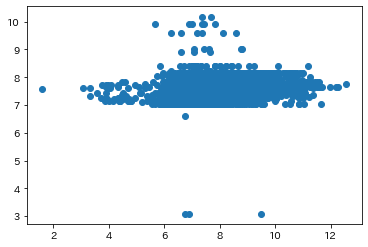

In [38]:
plt.scatter(y_test, y)

## random forest regressor

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ハイパーパラメータを探索する
# Grid Search
from tqdm import tqdm_notebook as tqdm
min_val_score = 1000
best_model = None

feature_names = top10.index
hyper_params = []

In [ ]:
%time
for max_depth in range(2, 14, 2):
    for n_estimators in range(50, 200, 50):
        regr = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
        regr.fit(X_train.loc[:, feature_names], y_train)
        y = regr.predict(X_val.loc[:, feature_names])
        score = np.sqrt(mean_squared_error(y, y_val))
        hyper_params.append(
            [max_depth, n_estimators, score]
        )
        print(max_depth, n_estimators, score)
        if score < min_val_score:
            best_model = regr
            min_val_score = score

In [ ]:
best_model.get_params()

In [ ]:
# test dataの精度

In [ ]:
y = best_model.predict(X_test[feature_names])

In [ ]:
np.sqrt(mean_squared_error(y, y_test))

In [ ]:
plt.scatter(y_test, y)

## Feature Engineering

In [ ]:
top10

In [ ]:
# 各変数の関係性を可視化する

In [ ]:
sns.pairplot(df[["shares"] + list(top10.index)], size = 5)

In [ ]:
for feat in top10.index:
    print(feat)
    plt.figure(figsize=(4, 4))
    df[feat].plot.hist(bins=50)
    plt.show()

## kwの差分

In [ ]:
df["kw_max_min_avg_diff"] = df["kw_max_avg"] - df["kw_max_min"]

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(
    x="kw_max_min_avg_diff",
    y="shares",
    size="shares",
    hue="shares",
    data=df[df["shares"] > 0]
)
plt.show()

## num_hrefsとnum_imgs

In [ ]:
df["num_hrefs+imgs"] = df["num_hrefs"] + df["num_imgs"]

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(
    x="num_hrefs",
    y="shares",
    size="shares",
    hue="shares",
    data=df[df["shares"] > 0]
)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(
    x="num_hrefs+imgs",
    y="shares",
    size="shares",
    hue="shares",
    data=df[df["shares"] > 0]
)
plt.show()

## 加工した特徴量の目的変数との相関を確認してみよう

In [ ]:
#top10 (加工元の特徴を抜いておく)
top10 = df.corr()["shares"].sort_values(ascending=False).drop([
    "kw_max_avg", "kw_min_avg", "num_hrefs", "num_imgs"
])[1: 11]
top10

## 精度を上げる
* 目的変数の異常値を、学習用データから除外する
* 複数の説明変数を加工してある

In [ ]:
df_X = df.drop(columns = [
    "url",
    "shares",
    "timedelta"
])
df_y = df["shares"]

In [ ]:
df_y.plot.hist(bins=50)

In [ ]:
train_index = (df["timedelta"] >= 300) & (df["shares"] >= 6) & (df["shares"] <= 10)

In [ ]:
X_train, y_train = df_X[train_index], df_y[train_index]
X_val, y_val       = df_X[val_index], df_y[val_index]
X_test, y_test   = df_X[test_index], df_y[test_index]

In [ ]:
y_train.plot.hist(bins=50)

In [ ]:
feature_names = X_train.columns
max_depth = 6
n_estimators = 150
regr = RandomForestRegressor(
    max_depth=max_depth,
    random_state=0,
    n_estimators=n_estimators,
    verbose=10,
    min_samples_leaf=50,
    max_features=40
)
regr.fit(X_train.loc[:, feature_names], y_train)
y = regr.predict(X_val.loc[:, feature_names])
score = np.sqrt(mean_squared_error(y, y_val))
hyper_params.append(
    [max_depth, n_estimators, score]
)
print("val_score: ", score)

In [ ]:
y = regr.predict(X_test[feature_names])
np.sqrt(mean_squared_error(y, y_test))

## 予測の可視化

In [ ]:
len(best_model)

In [ ]:
best_model[0]

In [ ]:
plt.scatter(y_test, y)

## 現状最高精度のGBMライブラリ"LightGBM"を用いる

In [41]:
import lightgbm as lgb

In [42]:
train_data = lgb.Dataset(X_train[feature_names], label=y_train)
val_data = lgb.Dataset(X_val[feature_names], label=y_val)
params = {'num_leaves': 10,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting_type": "gbdt",
          "metric": 'rmse',
          'random_state': 42
         }
regr = lgb.train(params,
                 train_data,
                 10000,
                 valid_sets = [train_data, val_data],
                 verbose_eval=100,
                 early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.915648	valid_1's rmse: 0.835136
[200]	training's rmse: 0.90177	valid_1's rmse: 0.823455
[300]	training's rmse: 0.894584	valid_1's rmse: 0.819436
[400]	training's rmse: 0.889982	valid_1's rmse: 0.817981
[500]	training's rmse: 0.886221	valid_1's rmse: 0.817332
[600]	training's rmse: 0.882852	valid_1's rmse: 0.816828
[700]	training's rmse: 0.879943	valid_1's rmse: 0.816681
Early stopping, best iteration is:
[669]	training's rmse: 0.880795	valid_1's rmse: 0.816669


In [ ]:
y = regr.predict(X_test[feature_names])
np.sqrt(mean_squared_error(y, y_test))

In [ ]:
plt.scatter(y_test, y)

In [ ]:
# 特徴量重要度のplot

In [ ]:
lgb.plot_importance(regr, figsize=(15, 15), max_num_features=30)